# Ejercicio de Regresión 1 (Core)


Objetivo:
 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

 Descripción del problema:
 Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada




In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Carga de datos: Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
* SqFt: Tamaño de la casa en pies cuadrados.
* Bedrooms: Número de habitaciones.
* Bathrooms: Número de baños.
* price: Precio de venta de la casa.

In [26]:
# cargar el dataset House Prices
data = pd.read_csv('../data/house_prices.csv')

# Definir las variables de entrada (X) y la variable objetivo (y)
X = data[["SqFt", "Bedrooms", "Bathrooms"]]  # Características para el modelo
y = data['Price']  # Variable objetivo

# Verificar la forma de X y las columnas
print(X.shape)
print(X.columns)
X.head()

(128, 3)
Index(['SqFt', 'Bedrooms', 'Bathrooms'], dtype='object')


,SqFt,Bedrooms,Bathrooms
0,1790,2,2
1,2030,4,2
2,1740,3,2
3,1980,3,2
4,2130,3,3


## Exploración de datos: 
Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

              SqFt    Bedrooms   Bathrooms
count   128.000000  128.000000  128.000000
mean   2000.937500    3.023438    2.445312
std     211.572431    0.725951    0.514492
min    1450.000000    2.000000    2.000000
25%    1880.000000    3.000000    2.000000
50%    2000.000000    3.000000    2.000000
75%    2140.000000    3.000000    3.000000
max    2590.000000    5.000000    4.000000
Valores faltantes: SqFt         0
Bedrooms     0
Bathrooms    0
dtype: int64


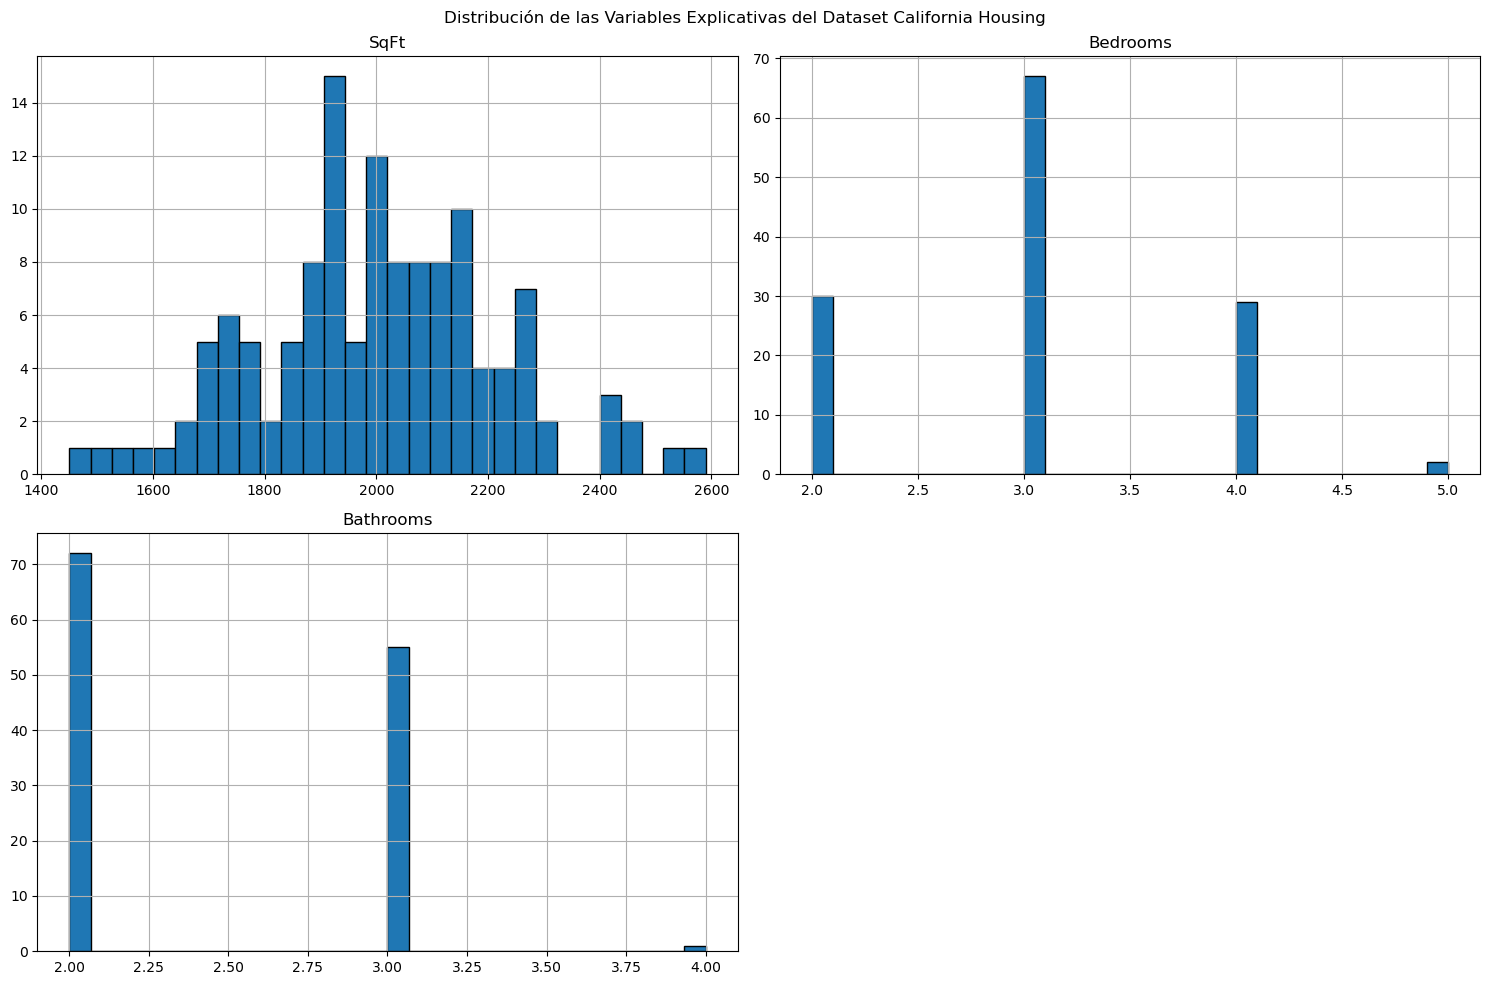

In [28]:
print(X.describe())
print("Valores faltantes:", X.isnull().sum())
# Crear histogramas para cada característica
X.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

## Preparación de datos: 
Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [30]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((102, 3), (26, 3))

## Entrenamiento del modelo: 
Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

In [40]:
# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluación del modelo: 
Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

In [ ]:
# Evaluación del modelo
y_pred = model.predict(X_test)  # Hacer predicciones con los datos de prueba

# Calcular el error cuadrático medio (MSE) y el R-cuadrado (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("R-cuadrado (R²):", r2)

Error cuadrático medio (MSE): 320149938.23026824
R-cuadrado (R²): 0.4568195777548876


## Predicción: 
Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
* Tamaño: 2000 pies cuadrados
* Habitaciones: 3
* Baños: 2

In [43]:
# Predicción para una casa específica
nueva_casa = [[2000, 3, 2]]  # Características de la casa: Tamaño=2000, Habitaciones=3, Baños=2
precio_predicho = model.predict(nueva_casa)
print("Precio predicho para la nueva casa:", precio_predicho[0])

Precio predicho para la nueva casa: 123536.99693218437


c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
